In [10]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from get_pipe_data import get_pipe_data
from point_cloud import FaceCloud
import pickle

In [11]:
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options, output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True, num_faces=1, )
detector = vision.FaceLandmarker.create_from_options(options)

I0000 00:00:1708511603.940759       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2 Max
W0000 00:00:1708511603.942602       1 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


In [12]:
im_path = "sample_images/Neutral.png"
# get image as RGB array
img_array = cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2RGB)
# get image as mediapipe image
img_mp = mp.Image(data=img_array, image_format=mp.ImageFormat.SRGB)
face_landmarks, blend_data, _ = get_pipe_data(detector, img_mp)

/Users/benhoskings/Documents/Pycharm/Hero_Monitor/venv/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


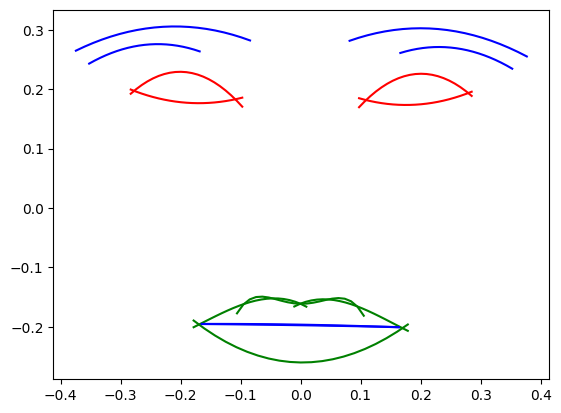

array([-1.20625736e+01, -5.88614402e+00, -4.45277470e-01, -1.61222431e-01,
        1.30077030e+01, -6.00438452e+00,  4.01019043e-01, -1.60815968e-01,
       -6.03611677e+02, -9.52436679e-01,  5.11692242e+00, -1.47628269e-02,
       -1.61139980e-01, -2.41724595e-01,  2.11122289e+00, -1.16137986e-02,
       -2.59877522e-01, -6.14120654e-02, -1.74481719e-02, -1.96236084e-01,
       -2.11505752e-02, -1.57763832e-02, -1.97231498e-01, -5.25949153e+00,
        2.11282818e+00,  1.36819150e-02,  1.85726337e+00, -6.52097771e-01,
        2.30604879e-01, -5.46059900e+00, -2.19420626e+00,  8.73430541e-03,
        1.77773713e+00,  6.02818329e-01,  2.27464967e-01, -1.51042804e+00,
        6.03393903e-01,  2.42144439e-01, -2.43834964e+00,  1.12314611e+00,
        1.41540502e-01, -1.49915359e+00, -6.28631109e-01,  2.39549571e-01,
       -2.50577270e+00, -1.19310408e+00,  1.33684384e-01,  3.25507020e-01,
        3.19480631e-01])

In [13]:
face = FaceCloud(face_landmarks)
face.preprocess()
face.create_shape_feature(demo=True)


In [14]:
with open('Reference.pickle', 'wb') as file:
    pickle.dump(face, file, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
im_path = "Sample_Images/Sad_003.png"
# get image as RGB array
img_array = cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2RGB)
# get image as mediapipe image
img_mp = mp.Image(data=img_array, image_format=mp.ImageFormat.SRGB)
face_landmarks_2, blend_data, _ = get_pipe_data(detector, img_mp)

[20.         75.65155735 33.21535059] [-1. -1. -1.]
(243,)


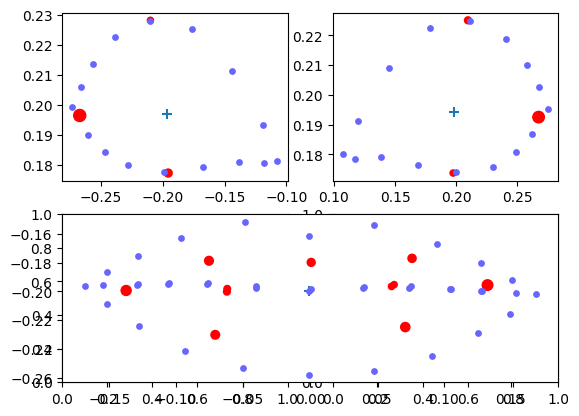

In [16]:
face_2 = FaceCloud(face_landmarks_2)

face_2.preprocess()
delta_feature = face_2.create_delta_feature(face, demo=True)
print(delta_feature.shape)

In [17]:
AUs = face_2.detect_action_units()
print(AUs.shape)

False


AttributeError: 'NoneType' object has no attribute 'shape'